In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_excel("/content/sample_data/glass.xlsx",sheet_name="glass")

In [5]:
df = pd.DataFrame(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


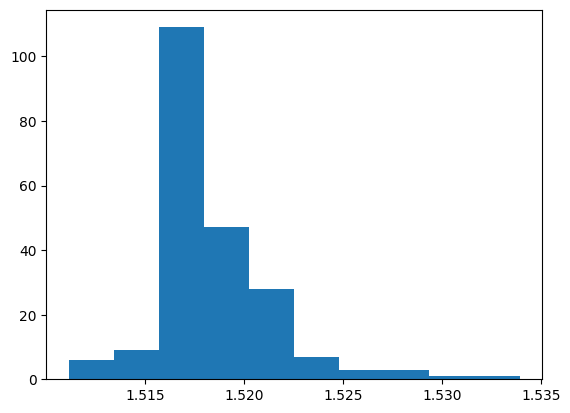

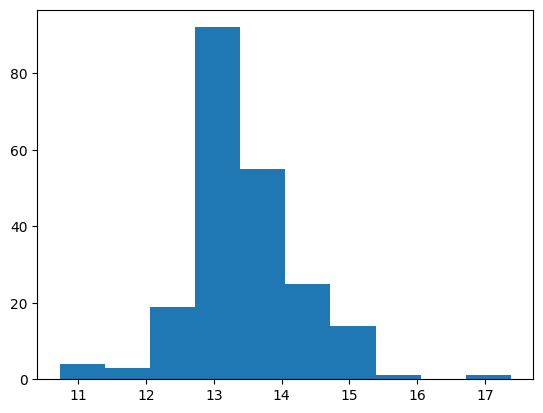

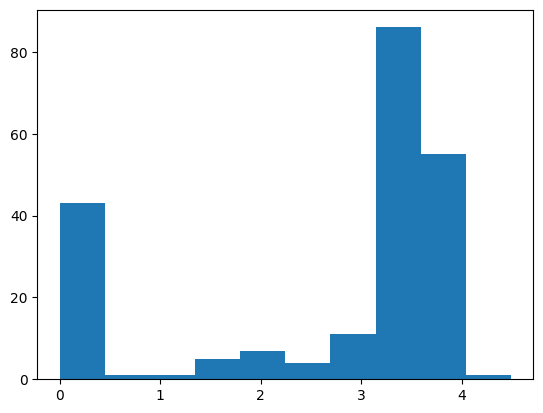

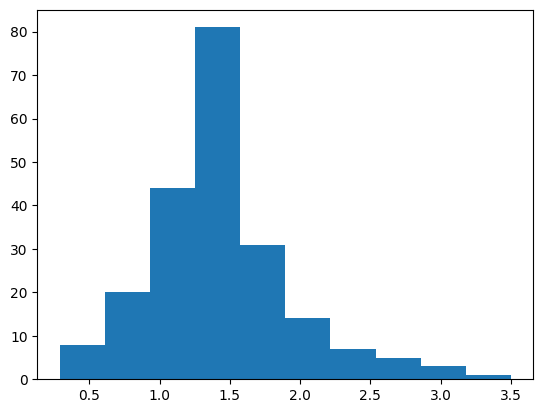

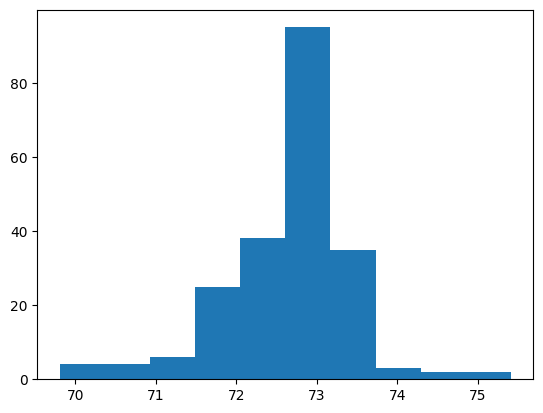

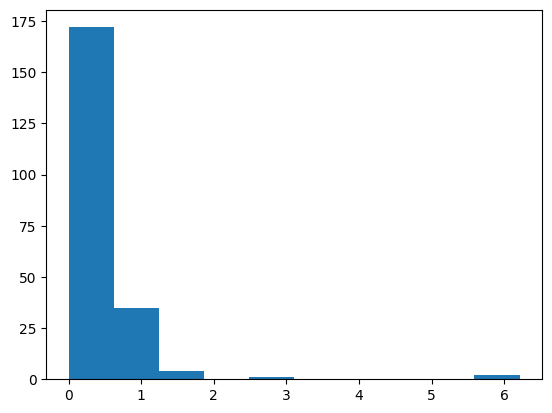

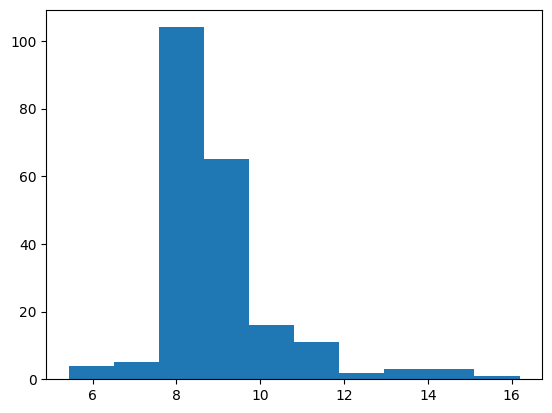

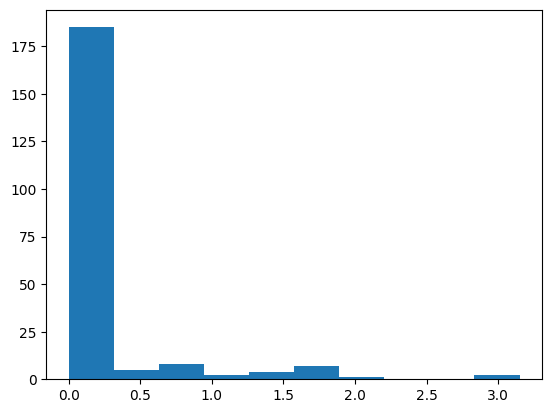

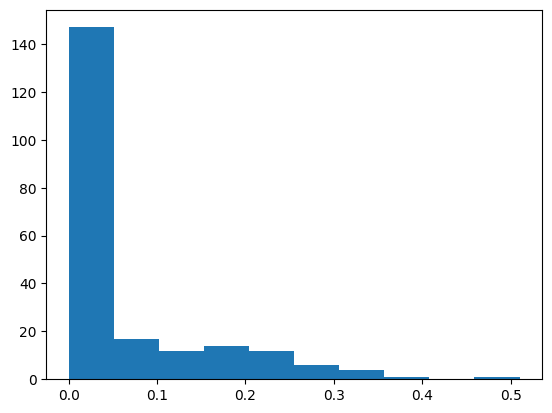

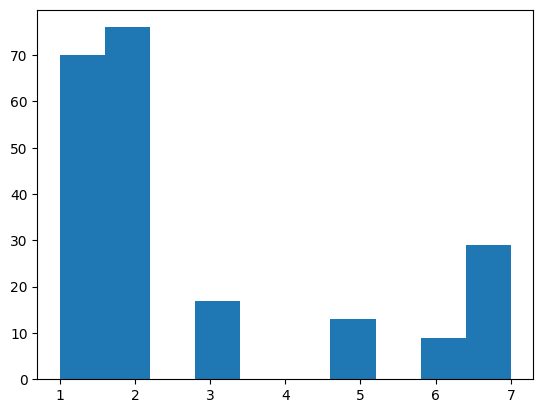

In [8]:
#Visualization using Histogram
for col_name in df.columns:
  plt.hist(df[col_name])
  plt.show()

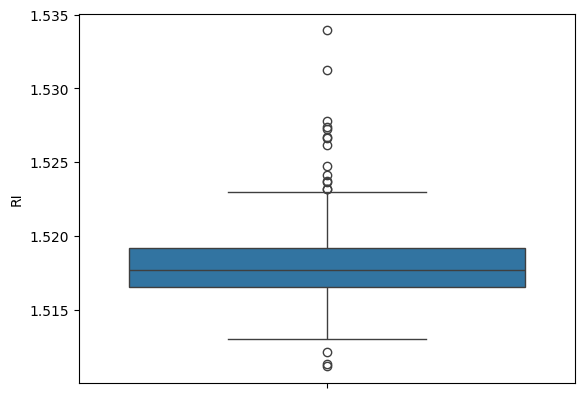

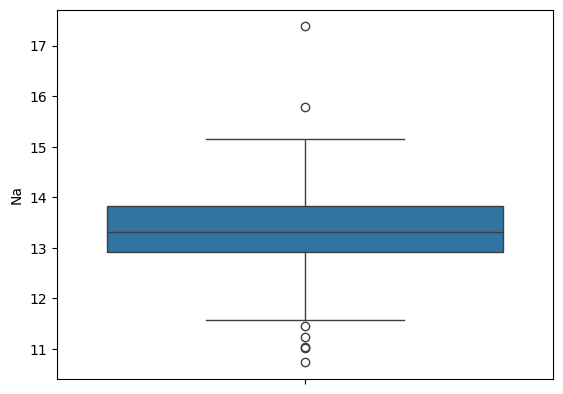

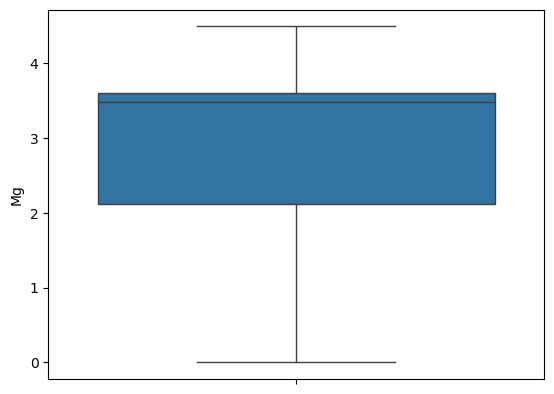

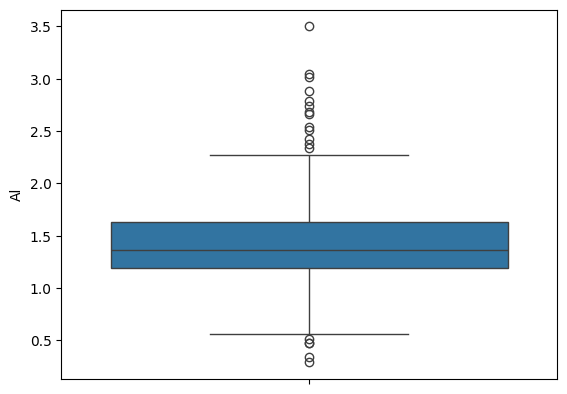

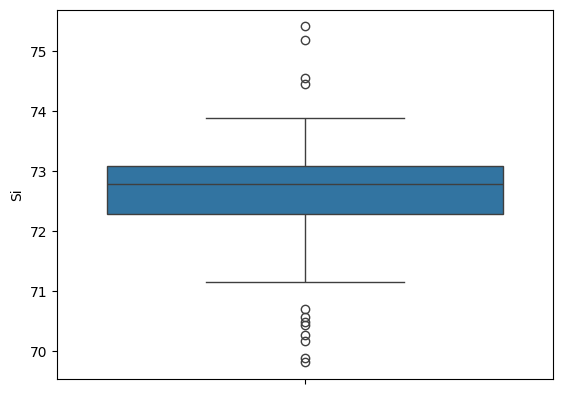

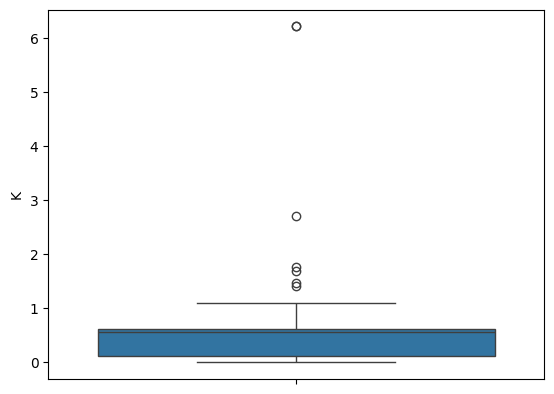

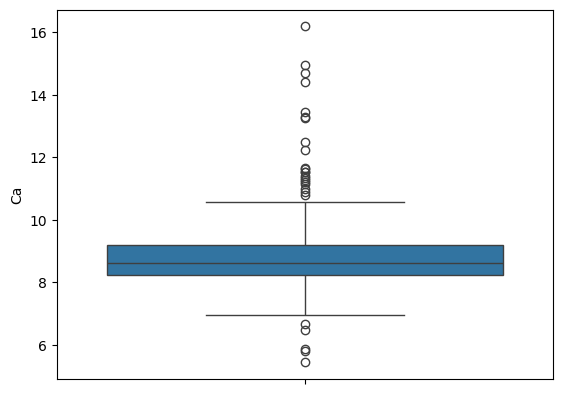

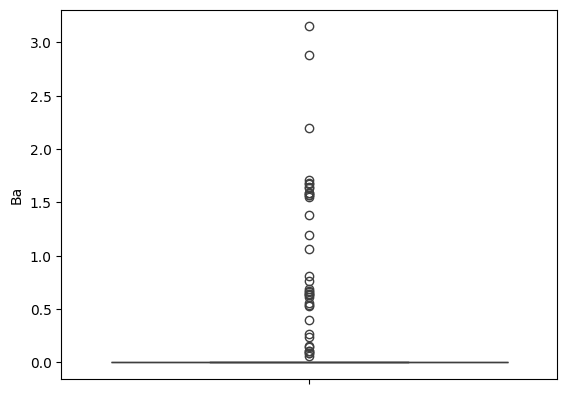

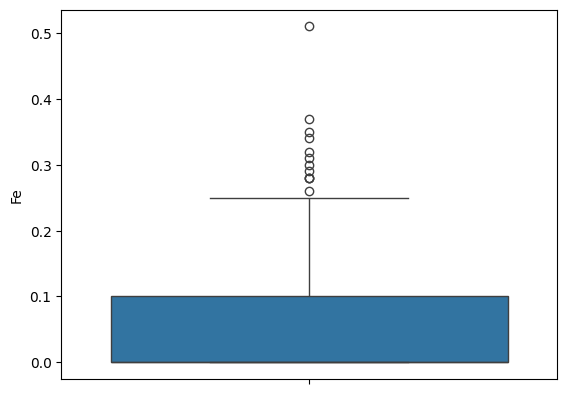

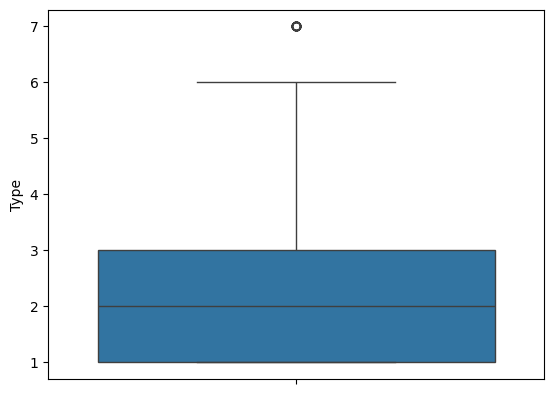

In [9]:
#Visulazation of Box plot
for col_name in df.columns:
  sns.boxplot(df[col_name])
  plt.show()

In [10]:
# Applying the Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Type',axis=1))
scaled_features = scaler.transform(df.drop('Type',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [11]:
#Applying the Model Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['Type'],test_size=0.3,random_state=42)

In [12]:
#Splitting the dataset for Training and testing
rfc = RandomForestClassifier(n_estimators=100)
#fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
rfc_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,rfc_pred)
precision = precision_score(y_test,rfc_pred,average='weighted')
recall = recall_score(y_test,rfc_pred,average='weighted')
f1 = f1_score(y_test,rfc_pred,average='weighted')
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)


Accuracy:  0.7846153846153846
Precision:  0.8135897435897437
Recall:  0.7846153846153846
F1 Score:  0.7811422972666483


In [14]:
#Applying bagging method
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(estimator=rfc,n_estimators=10,random_state=42)
bagging.fit(X_train,y_train)


BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [15]:
#Implementation of Evaluation metrics of bagging classifier
bagging_pred = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test,bagging_pred)
precision_bagging = precision_score(y_test,bagging_pred,average='weighted')
recall_bagging = recall_score(y_test,bagging_pred,average='weighted')
f1_bagging = f1_score(y_test,bagging_pred,average='weighted')
print("Accuracy (Bagging): ",accuracy_bagging)
print("Precision (Bagging): ",precision_bagging)
print("Recall (Bagging): ",recall_bagging)
print("F1 Score (Bagging): ",f1_bagging)

Accuracy (Bagging):  0.7692307692307693
Precision (Bagging):  0.8030290222597914
Recall (Bagging):  0.7692307692307693
F1 Score (Bagging):  0.7577577977577977


In [16]:
#Applying Boosting Method
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(estimator=rfc,n_estimators=50,random_state=42)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42)

In [17]:
#Implementation of Evaluation metrics of Booting classifier
adaboost_pred = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test,adaboost_pred)
precision_adaboost = precision_score(y_test,adaboost_pred,average='weighted')
recall_adaboost = recall_score(y_test,adaboost_pred,average='weighted')
f1_adaboost = f1_score(y_test,adaboost_pred,average='weighted')
print("Accuracy (AdaBoost): ",accuracy_adaboost)
print("Precision (AdaBoost): ",precision_adaboost)
print("Recall (AdaBoost): ",recall_adaboost)
print("F1 Score (AdaBoost): ",f1_adaboost)


Accuracy (AdaBoost):  0.7692307692307693
Precision (AdaBoost):  0.7859487179487179
Recall (AdaBoost):  0.7692307692307693
F1 Score (AdaBoost):  0.7628534256441233


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.


Bagging Method:It Involves training multiple models independently on different subsets of the training data.

How it differs:
*   Model Building: Parallel(models builts independently)
*  Data Sampling: Random sampling with replacement(bootstrapping)
*   Reduces variance
*   simple averaging or majority voting

Boosting Method:It involves building model sequentially, where each new model tries to correct the errors of the previous ones.

How it differs:


*   Model Building:Sequential (models built iteratively)
*   Data Sampling: Re-weights data based on previous model's performance

*   Reduces bias
*   Weighted averaging of models





2. Explain how to handle imbalance in the data.

Imbalance of data occurs when the number of observations belonging to one class(majority class) is significantly larger than those belonging to other classes(minority classes).

It can be handle using Ensemble Methods like Bagging/ boosting:



* It can handle data imbalance by incorporating resampling techniques for example oversampling the minority class or undersampling the majority class within each base model's training or cost-sensitive learning (assigning higher penalties for misclassifying the minority class) directly into their iterative or parallel model building processes. This helps the ensemble focus more on the minority class.

